In [120]:
from config import gkey
from config import weatherkey
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint

In [ ]:
# Build Cities Table 
# define empty lists
citylist = []
latlist = []
longlist = []
countrycodelist = []
loopcount = 0

# define length of script
MaxCities = 5


# create dataframe 
City_df = pd.DataFrame()
header_list = ['Lattitude','Longitude']
City_df = City_df.reindex(columns = header_list)      

# lats and longs
for cities in range(1,(MaxCities +1)):
    cities_lat = round(np.random.uniform(-90, 90),4)
    latlist.append(cities_lat)
    cities_long = round(np.random.uniform(-180, 180),4)
    longlist.append(cities_long)

# append Lattitude and Longitude to DF
City_df['Lattitude'] = pd.Series(latlist)
City_df['Longitude'] = pd.Series(longlist)


# Get Cities from PyCities
for i in range(0,len(City_df['Lattitude'])):
    lat = City_df.iloc[i]['Lattitude']
    long = City_df.iloc[i]['Longitude']
    cityname = citipy.nearest_city(lat,long).city_name.title()
    citycountry = citipy.nearest_city(lat,long).country_code.upper()
#     print(f'{lat} {long} {cityname} {citycountry}')
    citylist.append(cityname)
    countrycodelist.append(citycountry)

# Append Cities to DF
City_df.insert(0,'City',citylist)
City_df.insert(1, 'Country', countrycodelist)
City_df

In [ ]:
# Edit Dataframe and add columns

City_df['Temperature C'] = ""
City_df['Temperature F'] = ""
City_df['Revised Lattitude'] = ""
City_df['Revised Longitude'] = ""
City_df['Humidity %'] = ""
City_df['Cloudiness %'] = ""
City_df['Wind Speed (mph)'] = ""
City_df

In [ ]:
# api.openweathermap.org/data/2.5/weather?q=London,uk&appid={API key}

# build URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
# city = "Sao Filipe"
# country = 'CV'
comma = ','
andsign = '&'


# API GET & JSON
for index, row in City_df.iterrows():
    city = row['City']
    country = row['Country']
    full_url = base_url + city + comma + country + '&appid=' + weatherkey
    response = requests.get(full_url) 
    parsed_response = response.json()
    try:
        City_df.at[index,'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
        City_df.at[index,'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
        City_df.at[index,'Revised Lattitude'] = parsed_response["coord"]["lat"]
        City_df.at[index,'Revised Longitude'] = parsed_response["coord"]["lon"]
        City_df.at[index,'Humidity %'] = parsed_response["main"]["humidity"]
        City_df.at[index,'Cloudiness %'] = parsed_response["clouds"]["all"]
        City_df.at[index,'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
        print('city found: ' + city + " ," + country)
    except:
        print('City ' + city + ' not found! skipping')
        next
#     print(city + " " + str(CityTemp))




In [ ]:
City_df

In [ ]:
city = "Busselton"
country = 'AU'
full_url = base_url + city + comma + country + '&appid=' + weatherkey
response = requests.get(full_url) 
parsed_response = response.json()
# CityTemp = parsed_response["main"]["temp"]
pprint(parsed_response)


In [ ]:
if 'Bluff' in City_df['City'].values:
    print('yep!')



In [127]:
# define length of script
MaxCities = 20

# create dataframe 
City_df = pd.DataFrame()
header_list = ['City','Country','Lattitude','Longitude','Temperature C','Temperature F','Humidity %','Cloudiness %','Wind Speed (mph)']
City_df = City_df.reindex(columns = header_list)
City_df['City']= City_df['City'].astype(str)
City_df['Country']= City_df['Country'].astype(str)
City_df.dtypes

City                 object
Country              object
Lattitude           float64
Longitude           float64
Temperature C       float64
Temperature F       float64
Humidity %          float64
Cloudiness %        float64
Wind Speed (mph)    float64
dtype: object

In [134]:
loopcount = 0
MaxCities = 20

while loopcount < MaxCities:
    rowlist = []
    # set random lats and longs
    rand_lat = round(np.random.uniform(-90, 90),4)
    rand_long = round(np.random.uniform(-180, 180),4)
#     print(str(rand_lat) + " " + str(rand_long))
    # get city name and counry 
    cityname = citipy.nearest_city(rand_lat,rand_long).city_name.title()
    citycountry = citipy.nearest_city(rand_lat,rand_long).country_code.upper()
#     print(cityname + " " + citycountry)
    # test if city name already in list, and restart if so
    if cityname in City_df['City'].values:
        print(f'{cityname} is a Duplicate City, Restart!')
        continue
    # generate url and hit API 
    full_url = base_url + cityname + comma + citycountry + '&appid=' + weatherkey
    response = requests.get(full_url) 
    parsed_response = response.json()
    # attempt to load data into DF, if city was found and values can be parsed 
    try:
        City_df.at[loopcount, 'City']  = cityname    
        City_df.at[loopcount, 'Country'] = citycountry
        City_df.at[loopcount, 'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
        City_df.at[loopcount, 'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
        City_df.at[loopcount, 'Lattitude'] = parsed_response["coord"]["lat"]
        City_df.at[loopcount, 'Longitude'] = parsed_response["coord"]["lon"]
        City_df.at[loopcount, 'Humidity %'] = parsed_response["main"]["humidity"]
        City_df.at[loopcount, 'Cloudiness %'] = parsed_response["clouds"]["all"]
        City_df.at[loopcount, 'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
        print('city found: ' + cityname + " ," + citycountry)
        loopcount = loopcount + 1
    except:
        print('City ' + cityname + ' not found! skipping!')
        
    
    
#         City_df.at[index,'Country'] = citycountry
#         City_df.at[index,'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
#         City_df.at[index,'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
#         City_df.at[index,'Lattitude'] = parsed_response["coord"]["lat"]
#         City_df.at[index,'Longitude'] = parsed_response["coord"]["lon"]
#         City_df.at[index,'Humidity %'] = parsed_response["main"]["humidity"]
#         City_df.at[index,'Cloudiness %'] = parsed_response["clouds"]["all"]
#         City_df.at[index,'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)



    
    
City_df

city found: Cap Malheureux ,MU
New Norfolk is a Duplicate City, Restart!
city found: Beloha ,MG
city found: Ust-Nera ,RU
city found: Taber ,CA
city found: Carnarvon ,AU
city found: Bredasdorp ,ZA
City Tsihombe not found! skipping!
city found: Cabo San Lucas ,MX
city found: Vaini ,TO
city found: Torbay ,CA
City Mataura not found! skipping!
city found: Hermanus ,ZA
city found: Albany ,AU
Hermanus is a Duplicate City, Restart!
city found: Port Hedland ,AU
city found: Viedma ,AR
city found: Puerto Ayora ,EC
city found: Gijon ,ES
city found: Bluff ,NZ
Hermanus is a Duplicate City, Restart!
city found: Geraldton ,AU
city found: Kapaa ,US
City Kuytun not found! skipping!
city found: Rikitea ,PF
city found: Lavrentiya ,RU


,City,Country,Lattitude,Longitude,Temperature C,Temperature F,Humidity %,Cloudiness %,Wind Speed (mph)
0,Cap Malheureux,MU,-19.9842,57.6142,24.04,77.072,89.0,0.0,3.0016
1,Beloha,MG,-25.1667,45.0500,23.17,75.506,77.0,0.0,1.8592
2,Ust-Nera,RU,64.5667,143.2000,-18.61,0.302,93.0,85.0,7.9296
3,Taber,CA,49.8167,-112.1518,15.15,61.070,23.0,0.0,16.1280
4,Carnarvon,AU,-24.8667,113.6333,26.15,80.870,61.0,0.0,14.9856
5,Bredasdorp,ZA,-34.5322,20.0403,17.15,64.670,94.0,100.0,2.3072
6,Cabo San Lucas,MX,22.8909,-109.9124,26.15,80.870,22.0,1.0,4.9952
7,Vaini,TO,-21.2000,-175.2000,30.15,88.070,74.0,40.0,5.7568
8,Torbay,CA,47.6666,-52.7314,7.93,48.074,100.0,90.0,28.8064
9,Hermanus,ZA,-34.4187,19.2345,17.93,66.074,87.0,99.0,11.0208


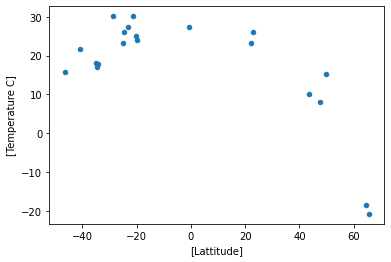

In [141]:
City_df.plot.scatter(['Lattitude'],['Temperature C'])

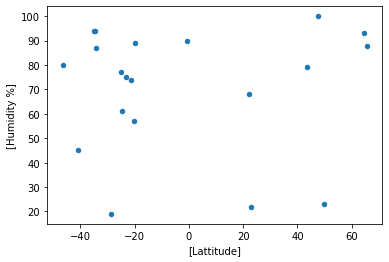

In [142]:
City_df.plot.scatter(['Lattitude'],['Humidity %'])

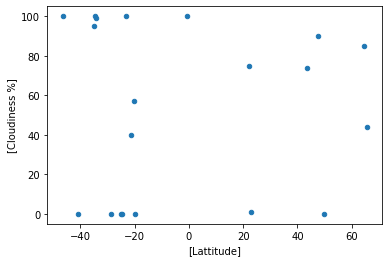

In [143]:
City_df.plot.scatter(['Lattitude'],['Cloudiness %'])